In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import roc_curve, auc

## Abstract
Our project is a study of games in the National Basketball Association, and their most important characteristics. The central question of our project is ‘what contributes to winning in the NBA?’ To approach this question, we created a logistic regression model that assesses variables in an NBA basketball game to determine which team will win a regular season game. 

This is a classification problem -  our output variable is a categorical variable indicating the probability that the home team of a given game will win. Additionally, this is a prediction problem as our model helps to make a future decision whether a team will win or lose based on past information.

The success of our model is determined by optimizing the prediction accuracy. We achieved an accuracy of 68.6%, which is a substantial increase from the 58.75% accuracy of a naive model. Our model is competitive with similar projects that have been developed, and can be used by basketball commentators and experts to make game analysis more accurate, effective and engaging. Additionally, it can be used by sports bettors to maximize profits from gambling on the winner of NBA games

## Background / Motivation

We chose a problem regarding the winner of NBA games for a variety of reasons. First, our group members have an interest in the NBA so we found it a fascinating topic to focus on. We also wanted to examine season statistics. As fans of the NBA is there a statistic a team has that optimizes winning? While individual players and wins and losses are often focused on, we thought it would be interesting to look at multi-season data for how team perform throughout the regular season to increase our understanding of the sport in a data context.


Lastly, we recognize how big a role and statistics and data science plays in this topic. Statistics and data science have become increasingly important in the NBA and the sports gambling industry. The NBA, in particular, has been at the forefront of using data analytics to drive decision-making. Teams use advanced metrics to evaluate player performance, identify strengths and weaknesses, and make strategic decisions on the court. With the rise of sports betting, data science has become essential in predicting game outcomes and analyzing player performance to inform betting odds. Betting companies rely heavily on data analytics to develop models that accurately predict the outcomes of games and help them set betting lines.

In the NBA, statistics have revolutionized the way teams evaluate players and make strategic decisions. Advanced metrics, such as player efficiency rating (PER) and true shooting percentage (TS%), provide a more comprehensive understanding of player performance beyond traditional statistics like points and rebounds. Teams can use these metrics to identify undervalued players, evaluate player fit within a system, and make informed decisions on contracts and trades. In the sports betting industry, data science has become essential in predicting game outcomes and informing betting odds. Data scientists use machine learning algorithms to analyze vast amounts of data, including player performance, injury history, and historical game data, to make accurate predictions on game outcomes. With the growing popularity of sports betting, data science will continue to play a significant role in the industry's success.

## Problem statement 

What contributes to winning? For our project we plan on creating a logistic model that assesses a number of variables in a NBA basketball game and creates a determination which team will win. This problem is a classification problem as  the output variable is a categorical variable indicating whether the team wins or loses. This is also a prediction problem as it attempts to make a future decision whether a team will win or lose based on past information.

There are several metrics that can be used to assess our model’s performance. We can access accuracy directly by dividing the number of correct predictions by the total number of predictions to get a proportion. We can also decide precision by dividing the number of true positive predictions by the number of true positive predictions plus the number of false positive predictions. Next we can decide recall by dividing the number of true positive predictions by the number of true positive predictions plus the number of false negative predictions. Lastly, as a more holistic metric, we can determine the model’s F1 score, a measure that balances precision and recall for binary classification.

In this model it is most likely beneficial to optimize for accuracy. While we do not expect our model's accuracy to be high, (if it were easy to have a high accuracy for the winner of a basketball game there would not be an entire gambling industry behind it) we aim to get significant results past the current distribution of outcomes.

Overall, we will need to explore the variables in their relationship to the model as a whole in order to get a better understanding of collinearity and correlation to better optimize variable selection. It is also important to test different models and different feature sets, and carefully evaluate their performance using the appropriate evaluation metrics to find the best model for our purposes. To do this will have to attempt different strategies such as regularization.


## Data sources

Our data source comes from kaggle, a community of data scientists and machine learning practicioners who upload datasets for public use. This data was taken from a user named Nathan Lauga who used web-scraping to congregate data on NBA seasons from the 2004 season (2003-2004) until December 2020.

The data includes five different files: games.csv, games_details.csv, players.csv, ranking.csv, and teams.csv.

- games.csv: ~26.7k rows and 21 columns (variables)
- games_details.csv: ~668k rows and 29 columns 
- players.csv: ~7250 rows and 4 columns
- ranking.csv: ~210k rows and 13 columns
- teams.csv: 30 rows and 14 columns

https://www.kaggle.com/datasets/nathanlauga/nba-games

## Stakeholders

Our primary group of stakeholders for this prediction problem is the sports betting community. Developing a model to determine a team's likelihood of winning in a given game can be a reliable resource allowing bettors to select the best bets to maximize profits. If successful, a model that optimizes prediction accuracy and improves upon the naive model puts users at an advantage when betting.

Additionally, NBA commentators and experts are key stakeholders of our project. For commentators and those whose job it is to talk about the game or create content about the NBA, understanding the win probability of a given team based on relevant game statistics to highlight to casual viewers can make their analysis more effective and engaging.

Lastly, if our prediction problem produces a model that is very interpretable, NBA players, coaches, and GMs can utilize it to understand the most important factors involved in winning and thus better their teams. Note as this is a secondary goal, and because the project is focused on prediction, the model developed may ultimately be too complicated for useful inference insights.

## Data quality check / cleaning / preparation 

In [5]:
# @hidden_cell
games = pd.read_csv('data/games_data.csv')
games_og = pd.read_csv('data/games.csv')
train = pd.read_csv('data/train.csv')
test1 = pd.read_csv('data/test1.csv')
test2 = pd.read_csv('data/test2.csv')

After filtering out the 2003 season (the first season of recorded data in our kaggle source data), we had zero NULL values. Variables include game/team identifiers and potential predictors. From prior knowledge of basic nba data as well as availability of continuous predictors, we have 7 important predictor variables: points, field goal percentage, free throw percentage, 3 point field goal percentage, assists, rebounds, and win percentage.

The self explanatory variables in our dataset as well as distributions of our useful predictors are displayed below. We assume that home and away teams have similar distributions for the useful predictors.

In [6]:
# identify variables that can help predict probability(HOME_TEAM_WINS)
games_og.columns

Index(['GAME_DATE_EST', 'GAME_ID', 'GAME_STATUS_TEXT', 'HOME_TEAM_ID',
       'VISITOR_TEAM_ID', 'SEASON', 'TEAM_ID_home', 'PTS_home', 'FG_PCT_home',
       'FT_PCT_home', 'FG3_PCT_home', 'AST_home', 'REB_home', 'TEAM_ID_away',
       'PTS_away', 'FG_PCT_away', 'FT_PCT_away', 'FG3_PCT_away', 'AST_away',
       'REB_away', 'HOME_TEAM_WINS'],
      dtype='object')

<AxesSubplot:xlabel='HOME_TEAM_WINS', ylabel='Density'>

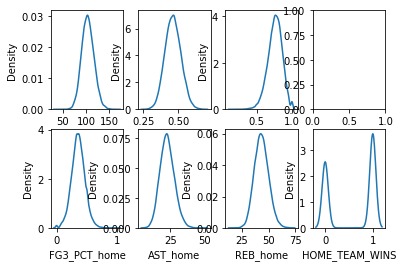

In [14]:
#Verify normal distribution of our continous variables (safe to assume same results from away statistics)
fig, axes = plt.subplots(2, 4)  
sns.kdeplot(games['PTS_home'], ax=axes[0,0]) 
sns.kdeplot(games['FG_PCT_home'], ax=axes[0,1]) 
sns.kdeplot(games['FT_PCT_home'], ax=axes[0,2]) 
sns.kdeplot(games['FG3_PCT_home'], ax=axes[1,0]) 
sns.kdeplot(games['AST_home'], ax=axes[1,1]) 
sns.kdeplot(games['REB_home'], ax =axes[1,2])
sns.kdeplot(games['HOME_TEAM_WINS'], ax=axes[1,3]) 

In [15]:
games['HOME_TEAM_WINS'].value_counts()

1    14845
0    10421
Name: HOME_TEAM_WINS, dtype: int64

The distribution of our response variable is also included above. An indication of 1 means that the home team won, and 0 means that the home team lost. This baseline model of value counts shows that ~58.75% of the time, the home team wins.

Our predictor variables were all on an individual game-by-game basis. To make them applicable to our prediction problem, we needed to aggregate each variable (by finding the respective average) up until the relevant game/observation in each season. For example find a team's points per game on the season at each specific game they play. This is because the aggregated data is what's readily available for making predictions. Our response variable (HOME_TEAM_WINS) and predictor variables after this important variable creation is as follows.

In [20]:
games.iloc[:, 21:].columns

Index(['HOME_TEAM_WINS', 'HOME_TEAM_PTS_AVG', 'AWAY_TEAM_PTS_AVG',
       'HOME_TEAM_AST_AVG', 'AWAY_TEAM_AST_AVG', 'HOME_TEAM_REB_AVG',
       'AWAY_TEAM_REB_AVG', 'HOME_TEAM_WIN_PCT', 'AWAY_TEAM_WIN_PCT',
       'HOME_TEAM_FG_PCT_AVG', 'AWAY_TEAM_FG_PCT_AVG', 'HOME_TEAM_FT_PCT_AVG',
       'AWAY_TEAM_FT_PCT_AVG', 'HOME_TEAM_FG3_PCT_AVG',
       'AWAY_TEAM_FG3_PCT_AVG', 'DIFF_PTS_AVG', 'DIFF_AST_AVG', 'DIFF_REB_AVG',
       'DIFF_WIN_PCT', 'DIFF_FG_PCT', 'DIFF_FT_PCT', 'DIFF_FG3_PCT'],
      dtype='object')

Our final data prepration prior to EDA and model development was splitting data into relevant parts of the season, and creating train and test data sets. Data used for model development included only regular season games, and excluded the first 10 games of each season so that aggregated data could give an accurate representation of a team's performance/talent/determinant of win probability. Training data we used is based off of data from the 2017-2019 seasons, and we created two test data sets from the 2020 NBA season and the 2021 NBA season respectively.

An example of the algorithm to create accumulated data for a season up to but not including each game is included below. Multiple iterations of this attempt was created to ensure that values included all datapoints relevant and, most importantly did not include the current game in the calculations.

In [ ]:
games.sort_values('GAME_DATE_EST', inplace=True)

teapts = {}
current_season = 2004

for index, row in games.iterrows():
    if row['SEASON'] == current_season:
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        home_team_pts = row['PTS_home']
        away_team_pts = row['PTS_away']

        if home_team_id not in team_pts:
            team_pts[home_team_id] = {'pts': 0, 'num_games': 0}

        if away_team_id not in team_pts:
            team_pts[away_team_id] = {'pts': 0, 'num_games': 0}

        team_pts[home_team_id]['pts'] += home_team_pts
        team_pts[away_team_id]['pts'] += away_team_pts
        team_pts[home_team_id]['num_games'] += 1
        team_pts[away_team_id]['num_games'] += 1

        if team_pts[home_team_id]['num_games'] > 1:
            home_team_avg_pts = (team_pts[home_team_id]['pts'] - home_team_pts) / (team_pts[home_team_id]['num_games'] - 1)
        else:
            home_team_avg_pts = np.nan

        if team_pts[away_team_id]['num_games'] > 1:
            away_team_avg_pts = (team_pts[away_team_id]['pts'] - away_team_pts) / (team_pts[away_team_id]['num_games'] - 1)
        else:
            away_team_avg_pts = np.nan

        games.loc[index, 'HOME_TEAM_PTS_AVG'] = home_team_avg_pts
        games.loc[index, 'AWAY_TEAM_PTS_AVG'] = away_team_avg_pts

    else:
        current_season = current_season + 1
        team_pts = {}
        home_team_id = row['HOME_TEAM_ID']
        away_team_id = row['VISITOR_TEAM_ID']
        home_team_pts = row['PTS_home']
        away_team_pts = row['PTS_away']

        if home_team_id not in team_pts:
            team_pts[home_team_id] = {'pts': 0, 'num_games': 0}

        if away_team_id not in team_pts:
            team_pts[away_team_id] = {'pts': 0, 'num_games': 0}

        team_pts[home_team_id]['pts'] += home_team_pts
        team_pts[away_team_id]['pts'] += away_team_pts
        team_pts[home_team_id]['num_games'] += 1
        team_pts[away_team_id]['num_games'] += 1

        if team_pts[home_team_id]['num_games'] > 1:
            home_team_avg_pts = (team_pts[home_team_id]['pts'] - home_team_pts) / (team_pts[home_team_id]['num_games'] - 1)
        else:
            home_team_avg_pts = np.nan

        if team_pts[away_team_id]['num_games'] > 1:
            away_team_avg_pts = (team_pts[away_team_id]['pts'] - away_team_pts) / (team_pts[away_team_id]['num_games'] - 1)
        else:
            away_team_avg_pts = np.nan

        games.loc[index, 'HOME_TEAM_PTS_AVG'] = home_team_avg_pts
        games.loc[index, 'AWAY_TEAM_PTS_AVG'] = away_team_avg_pts

## Exploratory data analysis

Because our relevant predictor variables derived from source data are common NBA knowledge, our main steps for exploratory data analysis was to ensure that we had no multicollinearity issues. Below we include the correlation table of our predictors as well as their variance inflation factors, both demonstrating no multicollinearity concerns. Therefore, we used all 7 predictor variables in our model development. 

<function matplotlib.pyplot.show(close=None, block=None)>

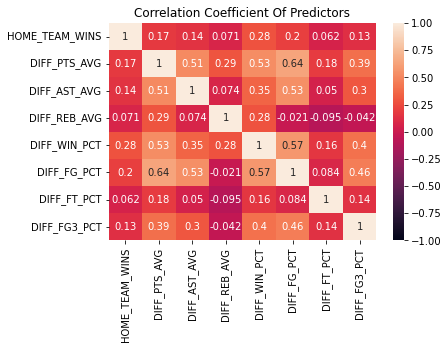

In [21]:
sns.heatmap(games[['HOME_TEAM_WINS', 'DIFF_PTS_AVG', 'DIFF_AST_AVG', 'DIFF_REB_AVG', 'DIFF_WIN_PCT', 'DIFF_FG_PCT', 'DIFF_FT_PCT', 'DIFF_FG3_PCT']].corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Coefficient Of Predictors')
plt.show

In [23]:
X = train[['DIFF_PTS_AVG', 'DIFF_AST_AVG', 'DIFF_REB_AVG', 'DIFF_WIN_PCT', 'DIFF_FG_PCT', 'DIFF_FT_PCT', 'DIFF_FG3_PCT']]

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

for i in range(len(X.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(X.values, i)

print(vif_data.sort_values('VIF', ascending=False))

        feature       VIF
5   DIFF_FG_PCT  2.975722
1  DIFF_PTS_AVG  2.548339
4  DIFF_WIN_PCT  2.118558
2  DIFF_AST_AVG  1.782973
3  DIFF_REB_AVG  1.658305
7  DIFF_FG3_PCT  1.558911
6   DIFF_FT_PCT  1.187217
0         const  1.001055


In [25]:
vif_data.T

,0,1,2,3,4,5,6,7
feature,const,DIFF_PTS_AVG,DIFF_AST_AVG,DIFF_REB_AVG,DIFF_WIN_PCT,DIFF_FG_PCT,DIFF_FT_PCT,DIFF_FG3_PCT
VIF,1.001055,2.548339,1.782973,1.658305,2.118558,2.975722,1.187217,1.558911


We created a logistic model to predict if the home team wins (1) or loses (0) the game. We optimized classification accuracy firstly, to increase effectiveness of the model in prediction for coaches, analysts and commentators, and precision secondly, to help sports betters in turning profits on winning games. 

While there is nothing unorthodox in our approach, one problem we anticipated was due to the volatile nature of basketball, where it's not uncommon for underdog teams to upset and defeat a more favored team, we were expecting our model not to yield an incredibly high classification accuracy, like an accruacy in the 70-80% area. With the proportion of wins (1s) in our training data being 58.75%, we aimed to develope a model with a classification accruacy greater than that. 

Our problem did not have solutions on Kaggle or elsewhere. 

Our base model did work, with accuracy above 58%, so we worked to improve interpredability. 

## Developing the model

In order to create a logistic regression, we needed to make a couple of assumptions and classifications. The first is that the dependent variable of the home team wins is a binary or dichotomous variable. The result of an NBA game can only be a team winning, classified as 1, or losing, classified as 0; therefore, this assumption holds true. Additionally, the proportion of 1s and 0s in home team wins is 58.75. In a regular season NBA game, each game is independent of the result of the previous game. While some teams may win more than others, if a team wins one game, it will not affect the outcome of the next game. Therefore, the observations are independent. The large sample size is ensured through using a significant number of NBA games across multiple seasons.

In order to check for multicollinearity, we looked at the correlation coefficients of all the differences between home team and away predictors along with our dependent variable, home team wins. All of the correlation coefficients were pretty low which suggests low multicollinearity. Additionally, we looked at the VIF for each of the predictor variables and found they were all between 1 and 2 which suggests low multicollinearity but enough to continue with our research. The accuracies for the train vs. test data were slightly higher than the train data which might suggest overfitting. However, since the classification accuracies were still very close we still decided to proceed with the data. 

The initial model that we examined incorporated all seven variables, including win percentage, field goal percentage, three-point percentage, average points, average assists, average rebounds, and free throw percentage, for the difference between home and away teams. A logistic regression was conducted, with these eight predictors being evaluated against the home team winning as the dependent variable. The model generated an LLR of 6.202e-97, indicating a statistically significant relationship. However, only the win percentage, average points, and average rebounds differences exhibited p-values less than 0.05, indicating the significance of these predictors. As for the classification accuracy, the model accurately classified 68.4% of the training data and 62.59% of the test data. 

To create our next model, we initially examined the correlation between home team wins and the remaining 21 variables. From this analysis, we identified four variables - win percentage, field goal percentage, three-point percentage, and average assists - that demonstrated the strongest correlation with home team wins. Utilizing these four variables, we developed a model to predict home team wins. This model produced a LLR of 8.056e-98, indicating a substantial relationship between the four variables and home team success. However, only the difference in win percentage had a significant p-value of below 0.05. To evaluate the model's performance, we assessed its accuracy on both training and testing data, yielding classification accuracies of 68.7% and 65.04%. Overall, this model correctly classified more of the train and test data sets than the previous one. 

The next model we looked at included all the interactions with the four most highly correlated difference predictor variables: difference in win percentage, field goal percentage, three-point percentage, and average assists. The overall model had a LLR of 3.617e-91 but the majority of these interactions within the model did not hold significance. The model still yielded an accuracy of 68.3% and recall of 82.3%. This model was interesting to look at but was not as helpful as some of the other models we created. 

The final model we created used forward stepwise feature selection. We first created a function to develop a model based on all the predictors within a subset. Then created a function to find the best predictors and help choose the model with the highest AUC-ROC called best_models. Then through forward selection, 11 models on 12 predictors were tested. We then created three plots against the number of predictors versus auc-roc, AIC, and BIC. We looked at the AIC graph to see that 4 predictors would produce the best model. Then using the best_models function set to 4 predictors, we created a logistic model with difference in win percentage, difference in rebound average, difference in points average, and home team average field goal percentage. This model yielded the lowest LLR of 1.759e-101 with all 4 predictors having significantly significant individual p-values below 0.05. Difference in average points has a negative relationship with the home team winning which makes sense because this takes into account both the home and away teams points. The other three predictors have a positive relationship with the home team winning. This model correctly identified 68.6% of predictions in the training data and 63.7% in the testing data. 

The model that we decided best represented our data was the model after forward stepwise feature selection because not only did it produce a high accuracy but also resulted in all the predictors being significant. We succeeded in achieving our goal as we found a model that was statistically significant for all the predictors with an accuracy of about 68.6%, recall of 82.2%, and precision of 70.7%. The final model equation is:


$\hat{(\text{HOME_TEAM_WINS})} = \frac{1}{1 + e^{-(3.7857 \cdot (\text{DIFF_WIN_PCT}) + 11.33 \cdot (\text{HOME_TEAM_FG_PCT_AVG}) + 0.0544 \cdot (\text{DIFF_REB_AVG}) - 0.0193 \cdot (\text{DIFF_PTS_AVG}))}}$

In [6]:
train = pd.read_csv('train.csv')
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(train)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

In [7]:
bestmodel = smf.logit("HOME_TEAM_WINS ~ DIFF_WIN_PCT + HOME_TEAM_FG_PCT_AVG + DIFF_REB_AVG + DIFF_PTS_AVG", data=train).fit()
bestmodel.summary()

Optimization terminated successfully.
         Current function value: 0.591628
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         HOME_TEAM_WINS   No. Observations:                 2981
Model:                          Logit   Df Residuals:                     2976
Method:                           MLE   Df Model:                            4
Date:                Tue, 14 Mar 2023   Pseudo R-squ.:                  0.1187
Time:                        21:29:56   Log-Likelihood:                -1763.6
converged:                       True   LL-Null:                       -2001.1
Covariance Type:            nonrobust   LLR p-value:                1.759e-101
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -4.6321      1.471     -3.149      0.002      -7.515      -1.749
DIFF_WIN_PCT             3.7857      0.231     16.368      0.000       3.332       4.239
HOME_TEAM_FG_PCT_AVG    11.3300      3.245      3.492      0.000       4.970      17.690
DIFF_REB_AVG             0.0544      0.019      2.904      0.004       0.018       0.091
DIFF_PTS_AVG            -0.0193      0.008     -2.471      0.013      -0.035      -0.004
========================================================================================
"""

Classification accuracy = 68.6%
Precision = 70.7%
TPR or Recall = 82.2%
FNR = 17.8%
FPR = 52.0%
ROC-AUC = 72.8%


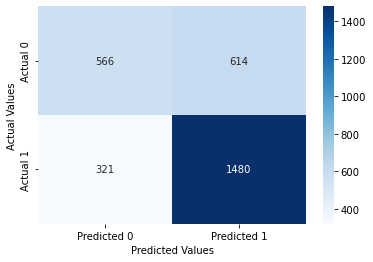

In [10]:
confusion_matrix_data(train,train.HOME_TEAM_WINS,bestmodel,cutoff=0.5)

## Limitations of the model with regard to inference / prediction

With our model addressing prediction, the first limitation is that our model does not account for factors like injury, changes in playstyle, or player trades. With our model building a predictions on team performance statistics, changes in individual performance like an injury or a player going to another team, will not be reflected in our model. The model could be advanced to include individual player statistics per game, to account for more of these variables' effects on the outcome of a game. 

In regards to outliers, we avoided removing and filtering outliers because we want to include as much data as possible without introducing bias for aggregated data.

Collecting the data relating to our model will not be very expensive for stakeholders as the NBA already maintains a robust stat tracking database. However, stakeholders must wait to be able to predict outcomes until after the first 10 games of a season. This is because our model is built off of aggregated data, where the first 10 games of a season are excluded to build an accurate representation of a team's aggregated stats.


Our model may become obsolute if the rules of basketball change drastically overtime, and new predictors are introduced that are more correlated with a winning outcome. However, as long as the rules of the NBA remain consistent, the model remains viable. 

## Conclusions and Recommendations to stakeholder(s)

We concluded that season win percentage was consistently the best predictor of the home team winning. In each model, the win percentage provides a significant relationship with the home team winning. Additionally, in our selected model, the difference between the home and away team’s win percentage, average home team field goals, and rebound average has a positive relationship with the home team winning. A one-unit increase in the average rebounds of the home team is associated with a 1.056 times increase in the odds of the home team winning. 

For the stakeholders that are NBA coaches and players, they should prioritize focusing on rebounds. Therefore, players during games should make sure to crash the boards and try to secure as many rebounds as possible. If players are able to increase the amount of rebounds, they may have a more likely chance of winning. For coaches, implementing more rebounding drills in practices would best prepare their players to win games. If coaches dedicate more time in practices to focus on rebounding techniques and skills, their players will be more equipped to rebound better as compared to their opponents. Additionally, points average in games proved to contribute significantly to the success of the home team winning. Therefore, if coaches tailor their practices to teach players how to score more efficiently through one-on-one drills and game simulation, they may increase their chance of winning at home. 

For commentators, these conclusions could help them make more relevant and effective statements. If commentators and experts are aware that rebounds may contribute to the home team winning, before the game starts, they could discuss the difference in the teams average rebounds in order to predict who might win the game most effectively. 

For sports bettors, if they are placing high amounts of money for who might win the game, they could highlight looking at past win percentage and average rebounds to make the most educated decisions on what team to bet on. Sports bettors take high risk with betting and our results can help them make more accurate predictions in order to make more money.

Stakeholders should be aware that the model focuses on if the home team wins. However, this affects sports bettors and commentators more as NBA players and coaches are always trying to win. Sports bettors do not always want to have a certain team win but want to maximize their profits. Similarly, commentators are just trying to make the most educated and accurate statements to inform listeners. Although the data is recent, the game is always changing. Players get traded and teams change. However, our model still would provide insight on overall factors that can influence winning. The game is changing where players are scoring more off certain factors like 3-point percentage as opposed to many years ago. Therefore, in the future, it would be interesting and more effective to update the model with the more recent data. 


## GitHub and individual contribution {-}

**Github link** for the project repository: https://github.com/y-ginther/DS_303_2_Think_Tank_GroupProject

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Connor Doolan</td>
    <td>Data quality check/cleaning/preparation; GitHub setup/facilitative work; Exploratory data analysis</td>
    <td>Cleaned data to eliminate null values, ensured predictors were normally distributed, assisted in variable creation, creation of relevant test and train datasets for regular season data, verification of no multicollinearity concerns</td>
    <td>12</td>
  </tr>
  <tr>
    <td>Rob Hickmott</td>
    <td>Data Research and Variable Creation</td>
    <td>Finding initial dataset to use, defining problem statement for classificaiton and prediction, development and implementation of game exclusive and season specific aggregate statistics algorithm, and identified reasoning behind null values</td>
    <td>3</td>
  </tr>
    <tr>
    <td>Yui Ginther</td>
    <td>Github setup; Model creation; Model Development; Application on Test Data</td>
    <td>Developed base model, feature selection through filtering, testing interactions and transformations, stepwise-forward feature selection</td>
    <td>6</td>    
  </tr>
    <tr>
    <td>Priya Thakore</td>
    <td>Model creation; Model Development; Application on Train Data</td>
    <td>Developed base model, feature selection through filtering, testing interactions and transformations on train data, stepwise-forward feature selection, confusion matrices</td>
    <td>7</td>    
  </tr>
</table>

List the **challenges** you faced when collaborating with the team on GitHub. Are you comfortable using GitHub? 
Do you feel GitHuB made collaboration easier? If not, then why? *(Individual team members can put their opinion separately, if different from the rest of the team)*

- Connor: I felt it was important to learn how to collaborate on GitHub and faced no challenges after initial learning phases and creation of the group repository.
- Rob: I had a number of issues with GitHub and felt it was hard to use even after intially being able to successfully pull and commit branches, at times I had to send .ipynb files directly to teammates after working on them.
- Yui: Github made file sharing much easier compared to last quarter. I faced challenges just in the learning curve of Github, syncing my local files with the repo, but took advantage of Github integrated with VS Code.
- Priya: Github helped with being able to share work, since two people worked on the cleaning/data preparation it was easy to recieve all the files in one place. I had issues with Github and found myself struggling to put them in the right place so people wouldn't get confused or see the correct ones